In [34]:
# Explore PCA with a high dimensional dataset
#
# Labeled Faces in the Wild

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_lfw_people
lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [36]:
lfw.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [37]:
lfw.target

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [38]:
lfw.data.shape

(1288, 1850)

In [39]:
lfw.images.shape

(1288, 50, 37)

In [40]:
lfw.images[0].shape

(50, 37)

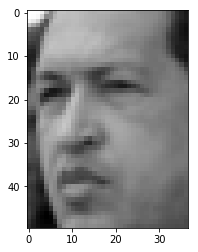

In [41]:
# the first image
# lfw.images[0] # 50 rows, 37 columns

# show the first image (in gray)
plt.imshow(lfw.images[0], cmap='gray')

# how to see colormaps
# plt.colormaps?

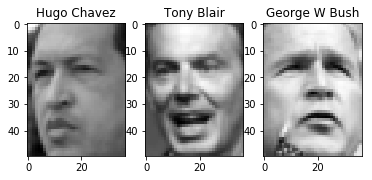

In [42]:
# how to show more than 1 picture at a time
fig, ax = plt.subplots(nrows=1, ncols=3)
ax.flatten()

for i in range(3):
    ax[i].imshow(lfw.images[i], cmap='gray')

    ax[i].set_title(lfw.target_names[lfw.target[i]])

In [43]:
# Let's do PCA on the 1850 features
#
# reduction to 150 dimensions

from sklearn.decomposition import PCA

pca = PCA(n_components=150)

#
# pca.fit_transform() - performs fit and transform in 1 function
# - use when you are doing initial fit with transform
#   at the same time with the same dataset
#
# or
#
# pca.fit()
# pca.transform()
# - use fit() with 1 dataset and transform() with different dataset
#
#

Z = pca.fit_transform(lfw.data)
print('before', lfw.data.shape, 'after', Z.shape)

before (1288, 1850) after (1288, 150)


In [44]:
lfw.data[0]

array([254.      , 254.      , 251.66667 , ...,  87.333336,  88.666664,
        86.666664], dtype=float32)

In [45]:
Z[0]

array([ 9.24224625e+01,  9.34040680e+01,  2.25703079e+02, -3.75703087e+01,
       -2.99395325e+02, -4.23658562e+01,  6.99125366e+01, -6.26705437e+01,
       -3.90615723e+02, -9.08143234e+01,  3.57143372e+02, -2.58836288e+01,
        7.05003738e+01,  2.15471497e+01, -1.55005737e+02, -2.51403137e+02,
       -3.84856731e-01,  1.13838943e+02,  2.05770996e+02,  1.97809326e+02,
        3.49701416e+02, -9.31107864e+01,  5.96235847e+01,  1.31167870e+01,
       -3.24688339e+01, -4.88482399e+01, -2.64136581e+01,  9.04567947e+01,
        1.38028732e+02, -8.25281754e+01,  3.89202919e+01,  4.54325180e+01,
       -1.34855728e+02, -1.00732956e+02, -2.67106743e+01,  2.29317799e+01,
       -5.92434387e+01, -1.21386093e+02,  1.17108521e+02,  1.69329819e+02,
        1.10023315e+02, -4.45504265e+01,  1.46814833e+01,  2.03788013e+01,
        1.13585541e+02,  3.93447838e+01, -6.16693115e+01, -5.19865303e+01,
        2.09792061e+01, -2.31569653e+01,  8.40905304e+01,  1.20170700e+02,
       -1.71518539e+02,  

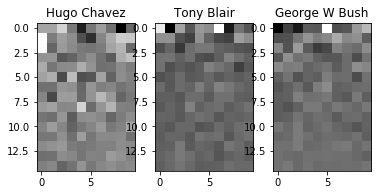

In [46]:
# plot the after images

# reshaping just to show as image in 2D
# 150 pixels = 15x10 image
# plt.imshow(Z[0].reshape(15, 10), cmap='gray')

# how to show more than 1 picture at a time
fig, ax = plt.subplots(nrows=1, ncols=3)
ax.flatten()

for i in range(3):
    ax[i].imshow(Z[i].reshape(15, 10), cmap='gray')
    ax[i].set_title(lfw.target_names[lfw.target[i]])

In [47]:
# plot the top eigenvectors

# these correspond to the 150 largest eigenvectors, sorted
# in decreasing explained variance (eigenvalues)
pca.components_

array([[-0.00681698, -0.00736361, -0.00855028, ..., -0.01404509,
        -0.01195601, -0.00964078],
       [ 0.02166533,  0.02048154,  0.02229037, ..., -0.04291789,
        -0.04126057, -0.03962978],
       [-0.02165645, -0.01930345, -0.01778292, ..., -0.05017773,
        -0.0440415 , -0.03936839],
       ...,
       [-0.00649644, -0.01071507, -0.00020174, ...,  0.02827487,
         0.01107981,  0.01543119],
       [ 0.01895263,  0.0067643 ,  0.00280289, ..., -0.0307913 ,
         0.002055  ,  0.0563269 ],
       [ 0.03703821,  0.03260726,  0.04219227, ...,  0.09569875,
         0.02335978, -0.07665042]], dtype=float32)

In [48]:
pca.components_.shape

(150, 1850)

In [49]:
pca.components_[0].shape

(1850,)

height 50 width 37


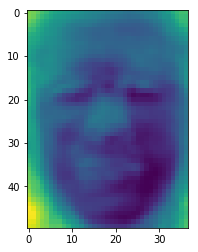

In [50]:
height = lfw.images.shape[1] # num rows
width = lfw.images.shape[2] # num cols

print('height', height, 'width', width)

plt.imshow(pca.components_[0].reshape(height, width))

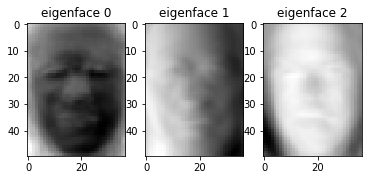

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=3)
ax.flatten()

# top 3 eigenvectors
for i in range(3):
    ax[i].imshow(pca.components_[i].reshape(50, 37), cmap='gray')
    ax[i].set_title('eigenface {}'.format(i))

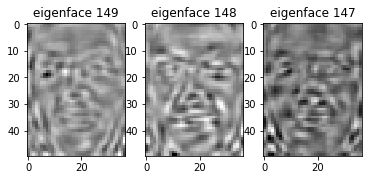

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=3)
ax.flatten()

# bottom 3 eigenvectors
for i in range(3):
    ax[i].imshow(pca.components_[149-i].reshape(50, 37), cmap='gray')
    ax[i].set_title('eigenface {}'.format(149-i))

In [53]:
# a preview of the effect of PCA on model accuracy
from sklearn.linear_model import LogisticRegression

# train a classifier without PCA
# train a classifier with PCA

model = LogisticRegression()
model_pca = LogisticRegression()

In [54]:
X = lfw.data
y = lfw.target

pca = PCA(n_components=150)
Z = pca.fit_transform(X)

model.fit(X, y) 
model_pca.fit(Z, y)

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warni

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
# 7 class classifier (7 persons)
print(model.coef_.shape)
# print(model.coef_)

print('Accuracy (non-PCA model)', model.score(X, y))

(7, 1850)
Accuracy (non-PCA model) 1.0


In [56]:
# model_pca.score(X, y)
#
# Using incorrect input dimensions:
# Results in
# ValueError: X has 1850 features per sample; expecting 150

In [57]:
# 7 class classifier (7 persons)
print(model_pca.coef_.shape)
# print(model_pca.coef_)

print('Accuracy (PCA model)', model_pca.score(Z, y))

(7, 150)
Accuracy (PCA model) 0.9743788819875776


In [58]:
# Without train-test split, we overfit the classifier (model)
# Overfit: perform very well on training set only

from sklearn.model_selection import train_test_split

# 1. split into training and test sets
# 2. do PCA
# 3. fit on train set

X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = PCA(n_components=150)
Z_train = pca.fit_transform(X_train)

model = LogisticRegression()
model_pca = LogisticRegression()

model.fit(X_train, y_train)
model_pca.fit(Z_train, y_train)

# 4. Compare scores on test set
Z_test = pca.transform(X_test) # not re-fitting PCA

print('Accuracy (PCA)', model_pca.score(Z_test, y_test))
print('Accuracy (no PCA)', model.score(X_test, y_test))

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warni

Accuracy (PCA) 0.8229813664596274
Accuracy (no PCA) 0.8509316770186336


In [59]:
X_train.shape

(966, 1850)

In [60]:
X_test.shape

(322, 1850)

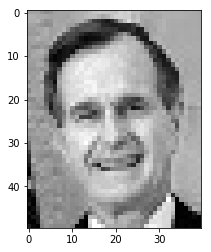

In [61]:
test = plt.imread('bush_snr.jpg')
plt.imshow(test[:, :, 0], cmap='gray')

In [62]:
# result_prob
lfw.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

(50, 37)
(1850,)
non-PCA:  ['Tony Blair'] 0.3084077513162943
PCA:  ['Tony Blair'] 0.27427292039563117


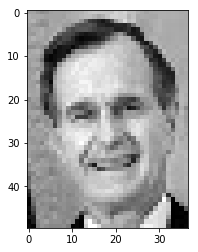

In [64]:
# row, col, channel
plt.imshow(test[:, 1:-2, 0], cmap='gray')
print(test[:, 1:-2, 0].shape)

test_data = test[:, 1:-2, 0].flatten()
print(test_data.shape)

# predict with non-PCA model
result = model.predict([test_data])
result_prob = model.predict_proba([test_data])
print('non-PCA: ', lfw.target_names[result],
      result_prob[0][result[0]])

# predict with PCA model
test_data_Z = pca.transform([test_data])

result_pca = model_pca.predict(test_data_Z)
result_prob_pca = model_pca.predict_proba(test_data_Z)
print('PCA: ', lfw.target_names[result_pca],
      result_prob_pca[0][result_pca[0]])

In [65]:
# from sklearn import *

In [66]:
# Continuing onto PCA ...

# plot explained variance ratio (to determine a good k)


[Text(0, 0.5, 'cumulative explained variance'),
 Text(0.5, 0, 'k'),
 Text(0.5, 1.0, 'PCA explained variance')]

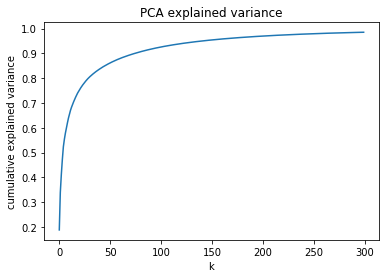

In [67]:
# look at explained variance for up to k=300
pca = PCA(n_components=300)

pca.fit(lfw.data)

# cumulative sum of the variances [v1, v2, v3, ...]
# [v1, v1+v2, v1+v2+v3, ....]

fig, ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_.cumsum())
ax.set(title='PCA explained variance', xlabel='k',
       ylabel='cumulative explained variance')

In [68]:
# PCA plot of 2 dimensions to explore dataset

(1288, 2)
(77,) (77,)
(236,) (236,)
0 Ariel Sharon
1 Colin Powell
2 Donald Rumsfeld
3 George W Bush
4 Gerhard Schroeder
5 Hugo Chavez
6 Tony Blair


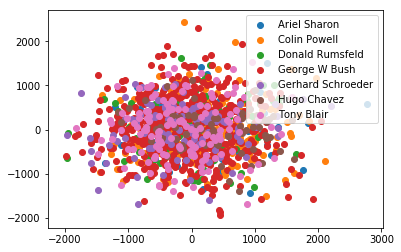

In [78]:
# plot the pixels reduced to 2-d and then colour code based
# on person
pca = PCA(n_components=2)

Z = pca.fit_transform(lfw.data) # Z is 2-D
print(Z.shape)

# all the rows for Ariel Sharon
print(Z[y==0, 0].shape, Z[y==0, 1].shape)
print(Z[y==1, 0].shape, Z[y==1, 1].shape)

# plot Z[0] vs Z[1], with colouring for each person
fig, ax = plt.subplots()

for i in range(len(lfw.target_names)):
    print(i, lfw.target_names[i])
    # scatter plot each target's subset of Z
    ax.scatter(Z[y==i, 0], Z[y==i, 1], label=lfw.target_names[i])

ax.legend()

0 Ariel Sharon
1 Colin Powell


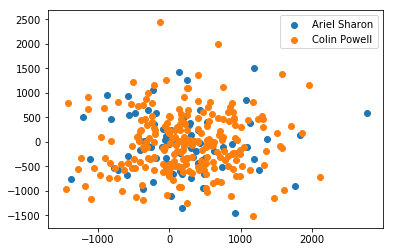

In [71]:
# plot only 2 people
%matplotlib inline

fig, ax = plt.subplots()

for i in range(len(['Ariel Sharon', 'Colin Powell'])):
    print(i, lfw.target_names[i])
    # scatter plot each target's subset of Z
    ax.scatter(Z[y==i, 0], Z[y==i, 1], label=lfw.target_names[i])

ax.legend()

In [80]:
# PCA in 2D only explained about 33.9% of variance
# so the plots above are just a very rough approximation
pca.explained_variance_ratio_.cumsum()

array([0.18831745, 0.33898705], dtype=float32)

In [74]:
import seaborn as sns
import pandas as pd

In [84]:
df = pd.DataFrame(Z, columns=['Z0', 'Z1'])
df['y'] = y
df.head()

,Z0,Z1,y
0,92.423164,93.404861,5
1,646.103333,-496.727417,6
2,-488.295776,-194.560837,3
3,161.949646,-206.062729,1
4,437.801025,646.208679,0


C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\mldds\lib\site-packages\numpy\core\fromnumeric.py:83

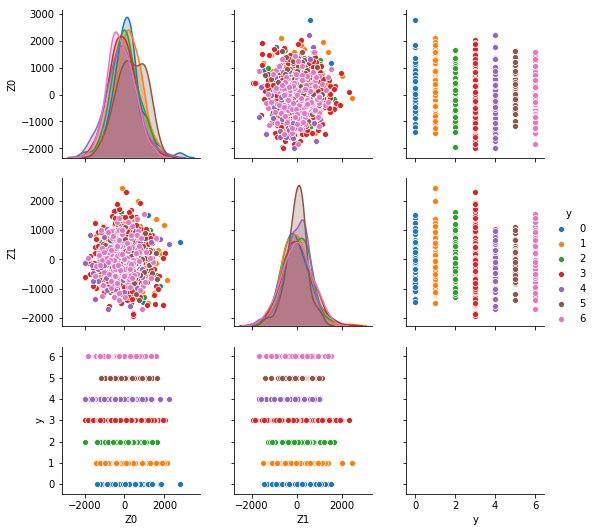

In [85]:
# create a pairplot with the PCA'ed features
# colour based on target (y)

# observe the overlapping classes
sns.pairplot(df, hue='y')

In [121]:
lfw.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [ ]:
# Explanation for boolean masking

In [103]:
y1 = y[:10]
y1

array([5, 6, 3, 1, 0, 1, 3, 4, 3, 0], dtype=int64)

In [111]:
y1 == 3 # mask

array([False, False,  True, False, False, False,  True, False,  True,
       False])

In [112]:
mask = (y1 == 3)
y1[mask]

array([3, 3, 3], dtype=int64)

In [113]:
Z1 = Z[:10]
Z1.shape

Z1[mask].shape # mask with same number of rows can be applied
               # to get a subset

(3, 150)

In [92]:
# TSNE plot of 2 dimensions to explore dataset
# Not really actionable because we can't use the
# result of TSNE to fit a model, just for viewing only :(
#
# TSNE is also quite slow....

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
Z_tsne = tsne.fit_transform(X)

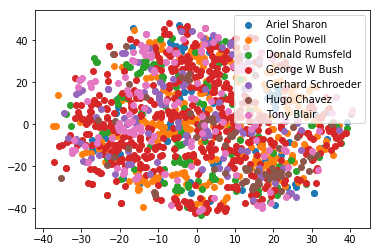

In [93]:
fig, ax = plt.subplots()

for i in range(len(lfw.target_names)):
    ax.scatter(Z_tsne[y==i, 0], Z_tsne[y==i, 1], label=lfw.target_names[i])

ax.legend()

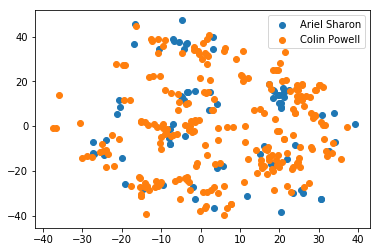

In [94]:
fig, ax = plt.subplots()

for i in range(len(['Ariel Sharon', 'Colin Powell'])):
    ax.scatter(Z_tsne[y==i, 0], Z_tsne[y==i, 1], label=lfw.target_names[i])

ax.legend()